In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt


In [2]:
df = pd.read_csv('../data/course_db_cleaned_final.csv', index_col = 0)

In [3]:
df.head()

,Course,Department,Term,Prof,Review,Prof Gender
0,MUS007: First-Year Seminar,AAAS,08W,Lindsay F.,"Never having studied African history, the mate...",Male
1,MUS007: First-Year Seminar,AAAS,08W,Lindsay F.,I personally am not that interested by the top...,Male
2,MUS007: First-Year Seminar,AAAS,08W,Lindsay F.,the professor was uninspiring and was easily i...,Male
3,MUS007: First-Year Seminar,AAAS,07W,Ayo Coly,The pace of this course is a little hectic. It...,Female
4,MUS007: First-Year Seminar,AAAS,07W,Ayo Coly,This class definitely had a lot of reading to ...,Female


In [4]:
# get departments with most reviews
df.groupby('Department').count().sort_values('Term').tail(10)

,Course,Term,Prof,Review,Prof Gender
Department,,,,,
CHEM,3050,3050,3050,3050,3050
PSYC,3471,3471,3471,3471,3471
MATH,3577,3577,3577,3577,3577
ANTH,3835,3835,3835,3835,3835
GOVT,5531,5531,5531,5531,5531
PHYS,5549,5549,5549,5549,5549
ECON,8380,8380,8380,8380,8380
ENGS,9418,9418,9418,9418,9418
COSC,11385,11385,11385,11385,11385


In [5]:
top10 = df.groupby('Department').count().sort_values('Term').tail(10).reset_index().sort_values('Term')
top10

,Department,Course,Term,Prof,Review,Prof Gender
0,CHEM,3050,3050,3050,3050,3050
1,PSYC,3471,3471,3471,3471,3471
2,MATH,3577,3577,3577,3577,3577
3,ANTH,3835,3835,3835,3835,3835
4,GOVT,5531,5531,5531,5531,5531
5,PHYS,5549,5549,5549,5549,5549
6,ECON,8380,8380,8380,8380,8380
7,ENGS,9418,9418,9418,9418,9418
8,COSC,11385,11385,11385,11385,11385
9,BIOL,11748,11748,11748,11748,11748


In [6]:
top10Depart = set(top10.Department)
top10Depart

{'ANTH',
 'BIOL',
 'CHEM',
 'COSC',
 'ECON',
 'ENGS',
 'GOVT',
 'MATH',
 'PHYS',
 'PSYC'}

In [7]:
top10df = df[df['Department'].isin(top10Depart)]
top10df

,Course,Department,Term,Prof,Review,Prof Gender
483,ANTH003: Introduction to Cultural Anthropology,ANTH,21F,John M. Watanabe,I feel like this review will diverge from some...,Male
484,ANTH003: Introduction to Cultural Anthropology,ANTH,21F,John M. Watanabe,"If you are looking for a GPA booster, do not t...",Male
485,ANTH003: Introduction to Cultural Anthropology,ANTH,21F,John M. Watanabe,I went into this class with no prior experienc...,Male
486,ANTH003: Introduction to Cultural Anthropology,ANTH,20F,John M. Watanabe,Prof is super nice but this class is terrible....,Male
487,ANTH003: Introduction to Cultural Anthropology,ANTH,20F,John M. Watanabe,Pretty standard as far as classes go. Professo...,Male
...,...,...,...,...,...,...
101744,PSYC 86.01: SelectiveDevelop.Deficits,PSYC,17F,Brad Duchaine,It was a very interesting class on material I ...,Male
101745,PSYC 86.01: SelectiveDevelop.Deficits,PSYC,17F,Brad Duchaine,This class revitalized my enthusiasm about the...,Male
101746,PSYC 86.01: SelectiveDevelop.Deficits,PSYC,17F,Brad Duchaine,This course was an ideal culminating experienc...,Male
101747,PSYC 86.01: SelectiveDevelop.Deficits,PSYC,17F,Brad Duchaine,Very interesting cumulative expereince.,Male


In [8]:
bars = alt.Chart(top10).mark_bar(size=50).encode(
    x=alt.X("Department",sort='-y'),
    y=alt.Y("Term", axis=alt.Axis(title='Number of Reviews')),
)

(bars).interactive().properties(
    height=300, 
    width=700,
    title = "Number of Reviews in Each Department",
)

alt.Chart(...)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


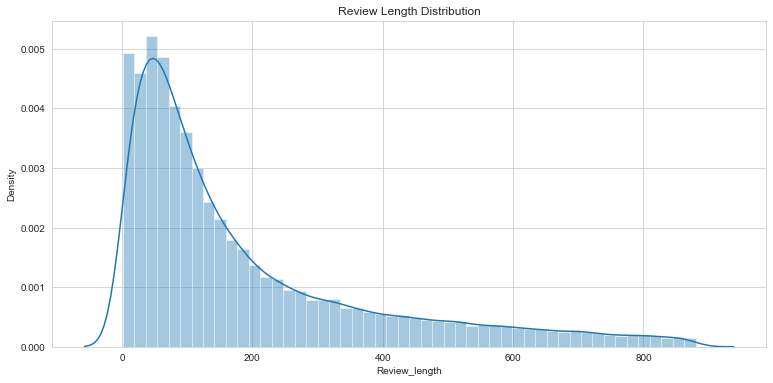

In [17]:
plt.figure(figsize=(12.8,6))
df['Review_length'] = df['Review'].str.len()
quantile_95 = df['Review_length'].quantile(0.95)
df_95 = df[df['Review_length'] < quantile_95]
sns.distplot(df_95['Review_length']).set_title('Review Length Distribution');

In [19]:
df_more10k = df[df['Review_length'] > 2000]
len(df_more10k)

495

In [20]:
df_more10k['Review'].iloc[0]

'Professor Amadiume is an incredibly sweet and intelligent woman. She was born in Nigeria, has lived through the Biafran War--is a storehouse of knowledge about Africa, past and present. Yet the seminar was a great disappointment.     The course was structured around a list of novels by Chinua Achebe and two African women authors.  Though Professor Amadiume assigned two or three of us to give a presentation on a book or a section of a book each class period, she made the reading optional for the rest of the class.  (Nine students total.)  The result:  no one save a few people read the optional novels, and Professor Amadiume encouraged the presenting group to spend most of its time recounting the book\'s plot!  When the group did raise questions for discussion, no one had anything to talk about because no one had had read the book, and the few students who did read didn\'t want to monopolize the discussion!  When we could have been having intelligent discussions--and we did have a few g

In [26]:
with open('../data/coursedataset.pickle', 'wb') as output:
    pickle.dump(df, output)